## TENSORFLOW 02 . Recurrent Neural Network data prep  21 APR 2021

#### Install required libraries for data manipulation

In [3]:
import numpy as np
import pandas as pd
import math

In [4]:
import matplotlib.pyplot as plt

#### Install required libraries for Tensor flow and Neural Network creation

In [5]:
##### 1.1 Install tensorflow

In [6]:
import tensorflow as tf

C:\Users\PABLO\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PABLO\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PABLO\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PABLO\anaconda3\envs\tensorflow_env\l

In [7]:
print(tf.version.VERSION)

1.14.0


##### 1.2 Install keras

In [8]:
from tensorflow import keras

##### 1.3 Install neural network types and configurations

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [10]:
## Get my working directory
import os
path = os.getcwd()

In [11]:
os.chdir('C:/Pablo UK/46 DATA SCIENCE all/44 Python')

In [12]:
# Sales_clean.to_csv (r'Sales_clean_plot_csv.csv', index = False, header=True)

In [13]:
Sales_clean  = pd.read_csv('Sales_clean_plot_csv.csv') 

In [14]:
pivot = Sales_clean.copy()

In [15]:
pivot.head()

,PERIOD,Orgname,StoreCode,Sales
0,2016-05-30,East coast branch,LA2,145.0
1,2016-05-31,East coast branch,LA2,158.0
2,2016-06-01,East coast branch,LA2,154.0
3,2016-06-02,East coast branch,LA2,152.0
4,2016-06-03,East coast branch,LA2,147.0


In [16]:
list(pivot.columns.values)

['PERIOD', 'Orgname', 'StoreCode', 'Sales']

In [17]:
SalesP = pd.pivot_table(Sales_clean, 
                        values = 'Sales', 
                        index=['PERIOD'], 
                        columns = 'Orgname').reset_index()

In [18]:
SalesP['PERIOD'] = pd.to_datetime(SalesP['PERIOD'])

In [19]:
SalesP.set_index("PERIOD",inplace=True)

<AxesSubplot:xlabel='PERIOD'>

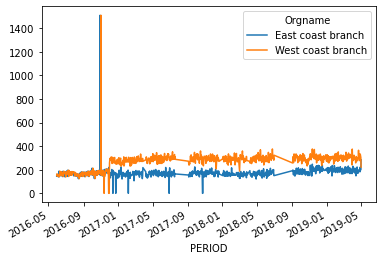

In [20]:
SalesP.plot()

In [21]:
SalesQ = pivot.copy()

In [22]:
SalesQ.head()

,PERIOD,Orgname,StoreCode,Sales
0,2016-05-30,East coast branch,LA2,145.0
1,2016-05-31,East coast branch,LA2,158.0
2,2016-06-01,East coast branch,LA2,154.0
3,2016-06-02,East coast branch,LA2,152.0
4,2016-06-03,East coast branch,LA2,147.0


In [23]:
list(SalesQ.columns.values)

['PERIOD', 'Orgname', 'StoreCode', 'Sales']

In [24]:
SalesQ.reset_index()

,index,PERIOD,Orgname,StoreCode,Sales
0,0,2016-05-30,East coast branch,LA2,145.0
1,1,2016-05-31,East coast branch,LA2,158.0
2,2,2016-06-01,East coast branch,LA2,154.0
3,3,2016-06-02,East coast branch,LA2,152.0
4,4,2016-06-03,East coast branch,LA2,147.0
...,...,...,...,...,...
1807,1807,2019-04-28,West coast branch,LA1,284.0
1808,1808,2019-04-29,West coast branch,LA1,333.0
1809,1809,2019-04-30,West coast branch,LA1,315.0
1810,1810,2019-05-01,West coast branch,LA1,304.0


In [25]:
list(SalesQ.columns.values)

['PERIOD', 'Orgname', 'StoreCode', 'Sales']

#### Subset columns 

In [26]:
SalesR = SalesQ[["PERIOD","Orgname","Sales"]]

In [27]:
SalesR.head()

,PERIOD,Orgname,Sales
0,2016-05-30,East coast branch,145.0
1,2016-05-31,East coast branch,158.0
2,2016-06-01,East coast branch,154.0
3,2016-06-02,East coast branch,152.0
4,2016-06-03,East coast branch,147.0


In [28]:
list(SalesQ.columns.values)

['PERIOD', 'Orgname', 'StoreCode', 'Sales']

In [29]:
type(SalesQ)

pandas.core.frame.DataFrame

In [30]:
dataTypeSeries = SalesQ.dtypes


In [31]:
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
PERIOD        object
Orgname       object
StoreCode     object
Sales        float64
dtype: object


In [32]:
print (type((SalesQ)))

<class 'pandas.core.frame.DataFrame'>


#### Subset variable names, select just East Coast branch 

We subset varibale values by using the double equal sign, first we quaote the dataset and then the variable within the dataset, and then we assign the value we want to filter for, in this case 'East coast branch', using single quotes

**Saleseast = SalesQ[SalesQ['Orgname'] =='East coast branch']**

This code abote is how you subset rows based on a variable value

In [33]:
Saleseast = SalesQ[SalesQ['Orgname'] =='East coast branch']

In [34]:
Saleseast.head()

,PERIOD,Orgname,StoreCode,Sales
0,2016-05-30,East coast branch,LA2,145.0
1,2016-05-31,East coast branch,LA2,158.0
2,2016-06-01,East coast branch,LA2,154.0
3,2016-06-02,East coast branch,LA2,152.0
4,2016-06-03,East coast branch,LA2,147.0


In [35]:
Saleseast

,PERIOD,Orgname,StoreCode,Sales
0,2016-05-30,East coast branch,LA2,145.0
1,2016-05-31,East coast branch,LA2,158.0
2,2016-06-01,East coast branch,LA2,154.0
3,2016-06-02,East coast branch,LA2,152.0
4,2016-06-03,East coast branch,LA2,147.0
...,...,...,...,...
901,2019-04-28,East coast branch,LA2,182.0
902,2019-04-29,East coast branch,LA2,222.0
903,2019-04-30,East coast branch,LA2,196.0
904,2019-05-01,East coast branch,LA2,211.0


Check again total number of colums in dataframe

In [36]:
list(SalesQ.columns.values)

['PERIOD', 'Orgname', 'StoreCode', 'Sales']

### Treat PERIOD as date

In [37]:
Saleseast['PERIOD'] = pd.to_datetime(Saleseast['PERIOD'])

C:\Users\PABLO\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
Saleseast.set_index("PERIOD",inplace=True)

In [39]:
Saleseast.head()

,Orgname,StoreCode,Sales
PERIOD,,,
2016-05-30,East coast branch,LA2,145.0
2016-05-31,East coast branch,LA2,158.0
2016-06-01,East coast branch,LA2,154.0
2016-06-02,East coast branch,LA2,152.0
2016-06-03,East coast branch,LA2,147.0


### Subset again columns

In [40]:
Saleseastmod = Saleseast[["Orgname","Sales"]]

In [41]:
Saleseastmod.head()

,Orgname,Sales
PERIOD,,
2016-05-30,East coast branch,145.0
2016-05-31,East coast branch,158.0
2016-06-01,East coast branch,154.0
2016-06-02,East coast branch,152.0
2016-06-03,East coast branch,147.0


In [42]:
list(Saleseastmod.columns.values)

['Orgname', 'Sales']

In [43]:
Saleseastmod.reset_index()

,PERIOD,Orgname,Sales
0,2016-05-30,East coast branch,145.0
1,2016-05-31,East coast branch,158.0
2,2016-06-01,East coast branch,154.0
3,2016-06-02,East coast branch,152.0
4,2016-06-03,East coast branch,147.0
...,...,...,...
901,2019-04-28,East coast branch,182.0
902,2019-04-29,East coast branch,222.0
903,2019-04-30,East coast branch,196.0
904,2019-05-01,East coast branch,211.0


### Rename column names

We can rename second col and get rid of Orgname

In [44]:
Sales_new = Saleseastmod.rename(columns ={'Sales':'Sales_east'})

In [45]:
Sales_new

,Orgname,Sales_east
PERIOD,,
2016-05-30,East coast branch,145.0
2016-05-31,East coast branch,158.0
2016-06-01,East coast branch,154.0
2016-06-02,East coast branch,152.0
2016-06-03,East coast branch,147.0
...,...,...
2019-04-28,East coast branch,182.0
2019-04-29,East coast branch,222.0
2019-04-30,East coast branch,196.0


### 1 Remove null values

In [46]:
Sales_new.isnull().sum()

Orgname       0
Sales_east    0
dtype: int64

Not required this time as there are not any null values

Check this notebook on how to remove null values from at TS dataframe "TENSORFLOW Data prep and removing null values"

#### This is the script to remove null values replacing them by same day previous week value

for row in range(0,len(SalesQ)):
    SalesQ['Eastbranch']=np.where(
                          (np.isnan(SalesQ['Eastbranch'])),
                           SalesQ['Eastbranch'].shift(7),SalesQ['Eastbranch']
                         )

In [47]:
SalesQ.isnull().sum()

PERIOD       0
Orgname      0
StoreCode    0
Sales        0
dtype: int64

for row in range(0,len(SalesQ)):
    SalesQ['Westbranch']=np.where(
                          (np.isnan(SalesQ['Westbranch'])),
                           SalesQ['Westbranch'].shift(7),SalesQ['Westbranch']
                         )

In [48]:
SalesQ.isnull().sum()

PERIOD       0
Orgname      0
StoreCode    0
Sales        0
dtype: int64

In [49]:
SalesQ.head()

,PERIOD,Orgname,StoreCode,Sales
0,2016-05-30,East coast branch,LA2,145.0
1,2016-05-31,East coast branch,LA2,158.0
2,2016-06-01,East coast branch,LA2,154.0
3,2016-06-02,East coast branch,LA2,152.0
4,2016-06-03,East coast branch,LA2,147.0


### 2 Subset again data

In [50]:
Sales_new.head()

,Orgname,Sales_east
PERIOD,,
2016-05-30,East coast branch,145.0
2016-05-31,East coast branch,158.0
2016-06-01,East coast branch,154.0
2016-06-02,East coast branch,152.0
2016-06-03,East coast branch,147.0


In [51]:
Mydata = Sales_new[["Sales_east"]]

In [52]:
Mydata.head()

,Sales_east
PERIOD,
2016-05-30,145.0
2016-05-31,158.0
2016-06-01,154.0
2016-06-02,152.0
2016-06-03,147.0


### 3 Plot East Sales 

Replace any value above 1000 by standard 150 value/ Average

<AxesSubplot:xlabel='PERIOD'>

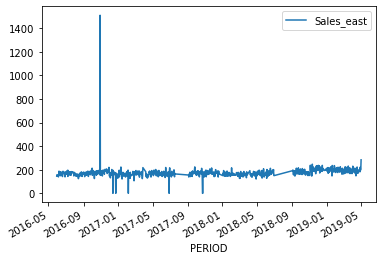

In [53]:
Mydata.plot()


Enhance this plot

Using matplotlib import matplotlib.pyplot as plt

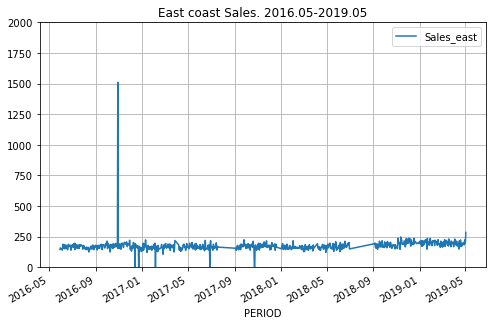

In [54]:
Mydata.plot(figsize=(8,5))
plt.grid(True)
## Change scale
plt.title("East coast Sales. 2016.05-2019.05")
plt.gca().set_ylim(0,2000) # This sets vertical range to [0-1]
plt.show()

We can setup a dark background from matplotlib

In [55]:
plt.style.use('dark_background')

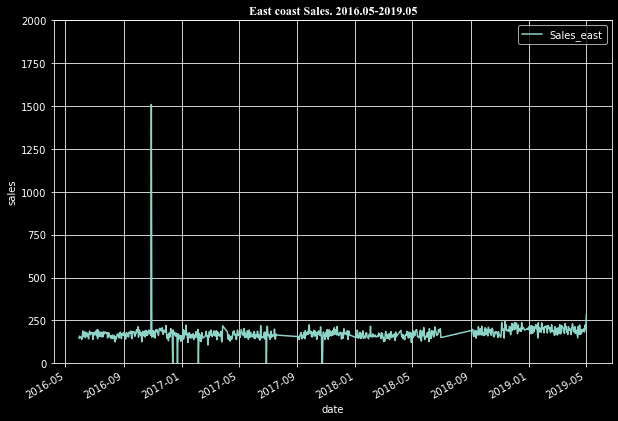

In [56]:
Mydata.plot(figsize=(10,7))
plt.grid(True)
## Change scale
plt.title("East coast Sales. 2016.05-2019.05",fontname ="Times New Roman",fontweight ="bold")
plt.gca().set_ylim(0,2000) 
plt.ylabel('sales')
plt.xlabel('date')
plt.show()

### 4 Remove outliers

We need to remove extreme values

In [57]:
Mydata.head()

,Sales_east
PERIOD,
2016-05-30,145.0
2016-05-31,158.0
2016-06-01,154.0
2016-06-02,152.0
2016-06-03,147.0


In [58]:
type(Mydata)

pandas.core.frame.DataFrame

####  4.1 Identify max and max values 

We use a combination of dataset, variable name and max function to obtain the max value

In [59]:
max_sales = Mydata["Sales_east"].max()


In [60]:
max_sales

1510.0

We use a combination of dataset, variable name and min function to obtain the min value

In [61]:
min_sales = Mydata["Sales_east"].min()

In [62]:
min_sales

0.0

####  4.3 Replace outliers by average value

We can use the same logic as in the max calculation to get the mean sales value

In [63]:
avg_sales = Mydata["Sales_east"].mean()

In [64]:
avg_sales

174.53863134657837

So then we only have to replace that extreme value by the mean. by using the replace function

In [65]:
Mydatab = Mydata.copy()

In [66]:
len(Mydata)

906

This is the standard replace function from Pandas

df.replace(current_value,new_value)

In [67]:
max

<function max>

In [68]:
Mydatab["Sales_east"].max()

1510.0

In [69]:
Mydatab["Sales_east"].mean()

174.53863134657837

In [70]:
max_Mydatab = Mydatab["Sales_east"].max()

In [71]:
max_Mydatab

1510.0

We could have replaced outliers by a specific value

SalesQ.loc[SalesQ.Eastbranch >1000,"Eastbranch"] = 300

SalesQ.loc[SalesQ.Eastbranch >1000,"Eastbranch"] = 300

We use this approach

In [72]:
Mydatab.loc[Mydatab.Sales_east >1000,"Sales_east"] = 174

SalesQ.loc[SalesQ.Westbranch >1000,"Westbranch"] = 300

**This is a way of replacing values above a certain treshold by the mean value**

In [73]:
Mydatab.loc[Mydatab.Sales_east >1000,"Sales_east"] = Mydata["Sales_east"].mean()

####  4.4 Plot new dataset

Plot resulting series

We change plot color in the plot statement.(darkorange,coral,gold,dodgerblue)

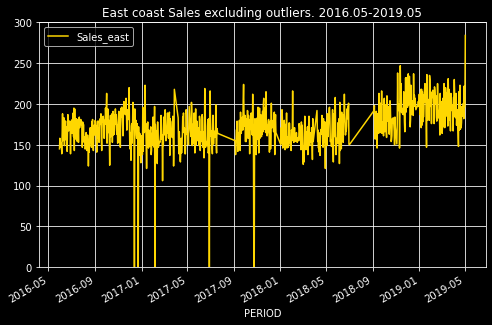

In [74]:
Mydatab.plot(figsize=(8,5),color ="gold")
plt.grid(True)
## Change scale
plt.title("East coast Sales excluding outliers. 2016.05-2019.05")
plt.gca().set_ylim(0,300) # This sets vertical range to [0-1]
plt.show()

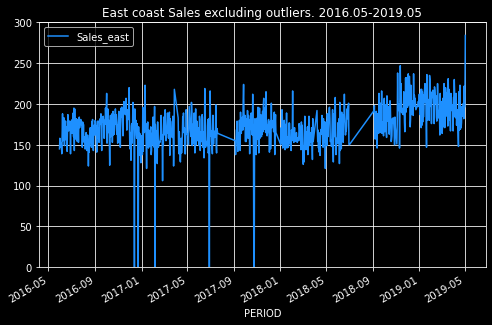

In [75]:
Mydatab.plot(figsize=(8,5),color ="dodgerblue")
plt.grid(True)
## Change scale
plt.title("East coast Sales excluding outliers. 2016.05-2019.05")
plt.gca().set_ylim(0,300) # This sets vertical range to [0-1]
plt.show()

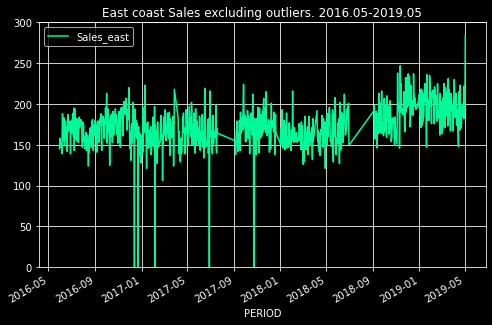

In [76]:
Mydatab.plot(figsize=(8,5),color ="mediumspringgreen")
plt.grid(True)
## Change scale
plt.title("East coast Sales excluding outliers. 2016.05-2019.05")
plt.gca().set_ylim(0,300) # This sets vertical range to [0-1]
plt.show()

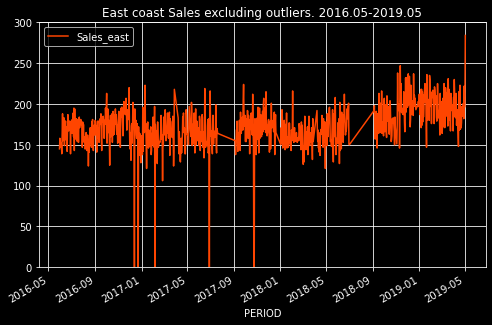

In [77]:
Mydatab.plot(figsize=(8,5),color ="orangered")
plt.grid(True)
## Change scale
plt.title("East coast Sales excluding outliers. 2016.05-2019.05")
plt.gca().set_ylim(0,300) # This sets vertical range to [0-1]
plt.show()

We can also remove the very low values

In [78]:
Mydatab.loc[Mydatab.Sales_east <100,"Sales_east"] = 174

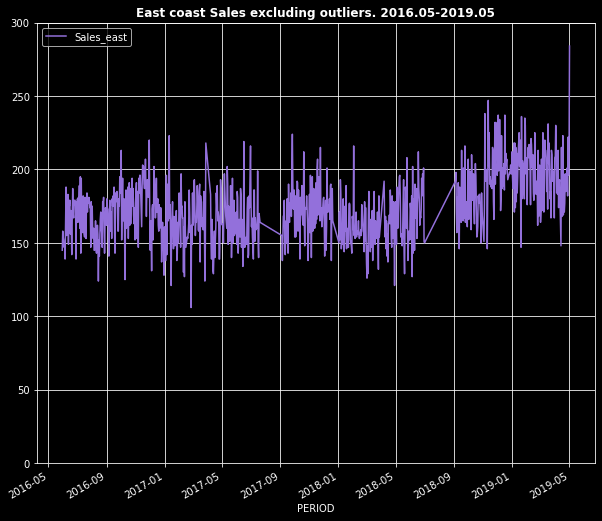

In [79]:
Mydatab.plot(figsize=(10,9),color ="mediumpurple")
plt.grid(True)
## Change scale
plt.title("East coast Sales excluding outliers. 2016.05-2019.05",fontweight="bold")
plt.gca().set_ylim(0,300) # This sets vertical range to [0-1]
plt.show()

Now the serie is ready to carry on with it

In [80]:
Mydatab.head()

,Sales_east
PERIOD,
2016-05-30,145.0
2016-05-31,158.0
2016-06-01,154.0
2016-06-02,152.0
2016-06-03,147.0


## 5 Start modelling using Neural networks 

Check CUDA installation. New CUDA drivers not installed in this Anaconda version

In [81]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11540453352758369441
]


### 5.1  Split original data into train validation and hold sets

#### 1. Split main dataset into Train Validation and Hold subsets of data
#### Train (70%, 84), Validation (20%, 24), Hold (10%, 12). Total rows 120

* Train (70%, 84), 
* Validation (20%, 24), 
* Hold (10%, 12). Total rows 120

In [82]:
len(Mydatab)

906

In [83]:
Mydatab

,Sales_east
PERIOD,
2016-05-30,145.0
2016-05-31,158.0
2016-06-01,154.0
2016-06-02,152.0
2016-06-03,147.0
...,...
2019-04-28,182.0
2019-04-29,222.0
2019-04-30,196.0


**Tip**: Always check the start and end date of the original dataset before splitting it into Train validation and hols datasets

When we display the entire dataset, we know that the start date is 2016-05-30 abd the end date is 2019-05-02

####Training dataset (70%, 84)
traindata = Emergency_admissions.iloc[0:84]

* Train

In [84]:
906*70/100


634.2

* Validation

In [85]:
906*20/100

181.2

* Hold

In [86]:
906*10/100

90.6

In [87]:
# Training dataset (70%, 634 of 906)
traindata = Mydatab.iloc[0:634]

In [88]:
len(traindata)

634

In [89]:
traindata.head()

,Sales_east
PERIOD,
2016-05-30,145.0
2016-05-31,158.0
2016-06-01,154.0
2016-06-02,152.0
2016-06-03,147.0


In [90]:
traindata

,Sales_east
PERIOD,
2016-05-30,145.0
2016-05-31,158.0
2016-06-01,154.0
2016-06-02,152.0
2016-06-03,147.0
...,...
2018-05-20,129.0
2018-05-21,165.0
2018-05-22,188.0


In [91]:
634+181

815

In [92]:
# Validation dataset (20%, 181 of 906)
valdata = Mydatab.iloc[634:815]

In [93]:
valdata

,Sales_east
PERIOD,
2018-05-25,208.0
2018-05-26,166.0
2018-05-27,138.0
2018-05-29,158.0
2018-05-30,152.0
...,...
2019-01-27,180.0
2019-01-28,235.0
2019-01-29,230.0


In [94]:
# Hold dataset (10%, 90 of 906)
hold = Mydatab.iloc[815:]

In [95]:
hold

,Sales_east
PERIOD,
2019-02-01,208.0
2019-02-02,176.0
2019-02-03,208.0
2019-02-04,215.0
2019-02-05,208.0
...,...
2019-04-28,182.0
2019-04-29,222.0
2019-04-30,196.0


So finally this is the perfect way as we split succcessfully the original dataset into *Train* *Test* and *Hold* datasets

## Training dataset (70%, 634 of 906)
traindata = Mydatab.iloc[0:634]
## Validation dataset (20%, 181 of 906)
valdata = Mydatab.iloc[634:815]
## Hold dataset (10%, 90 of 906)
hold = Mydatab.iloc[815:]

This is the dataset split
- **Training dataset (70%, 634 of 906)**
* traindata = Mydatab.iloc[0:634]
- **Validation dataset (20%, 181 of 906)**
* valdata = Mydatab.iloc[634:815]
- **Hold dataset (10%, 90 of 906)**
* hold = Mydatab.iloc[815:]

In [96]:
# Training dataset (70%, 634 of 906)
traindata = Mydatab.iloc[0:634]

In [97]:
traindata = Mydatab.iloc[0:634]

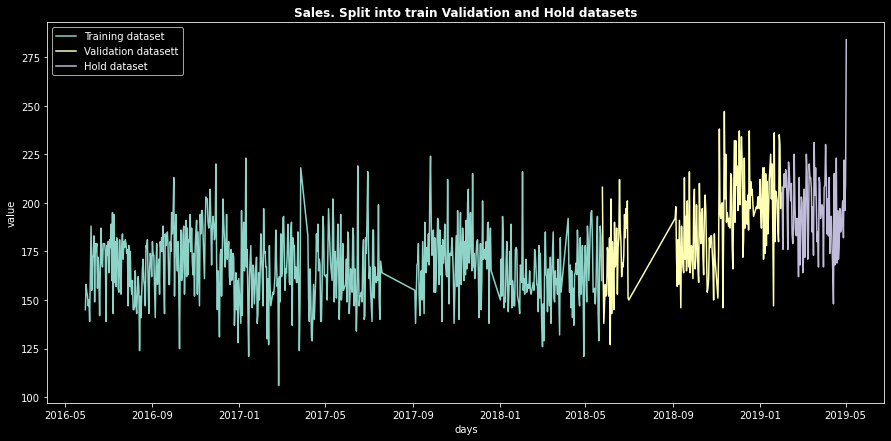

In [98]:
plt.figure(figsize=(15,7))
plt.title('Sales. Split into train Validation and Hold datasets',fontweight="bold")
plt.plot(traindata, label = "Training dataset")  # Dataset 
plt.plot(valdata, label = "Validation datasett")  # Dataset 
plt.plot(hold, label = "Hold dataset") # Dataset
plt.legend()
plt.ylabel("value")
plt.xlabel("days")
plt.show()

In [99]:
type(traindata)

pandas.core.frame.DataFrame

In [100]:
traindata_test = traindata.copy()

In [101]:
type(traindata_test)

pandas.core.frame.DataFrame

### 6.1 Setup Scaler

 This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between **zero** and **one**.Transform features by scaling each feature to a given range.

We will use the The Min Max Scaler library from skelarn 

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
# The dataset will be scaled between 0  and 1 
# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0,1))

In [104]:
scaler

MinMaxScaler()

### 6.2 Scale **TRAIN** dataset

### 6.2.1. Train dataset scaled using MinMaxScaler. The data will be scaled between 0 and 1

### 6.2.2 We apply the MinMaxScaler to the Train dataset. It applies to 2d objects

The MinMaxScaler function must be aaplied on a DataFrame. It expects a 2d object. So we need to heck for the traindata dataframe whether it is a 2d object by using the .shape() function

#### Training dataset (70%, 634 of 906)
#### traindata = Mydatab.iloc[0:634]

Check first Traindata shape

In [105]:
traindata.shape

(634, 1)

In [106]:
print("Length of the original Traindata is:",len(traindata))

Length of the original Traindata is: 634


In [107]:
Traindata = scaler.fit_transform(traindata)

### 6.2.3 Scaled dataset turn into an series 1D object for the Network setup

In [108]:
flat_Traindata = Traindata.flatten()

In [109]:
flat_Traindata.shape

(634,)

In [110]:
type(flat_Traindata)

numpy.ndarray

Remember we need to setup the series accordingly to the traindata index, as this is our original traindata data set

In [111]:
Traindata_scaled = pd.Series(flat_Traindata,
                            index=traindata.index)

### 6.2.4 Build Target and Features dataset from Traindata_scaled dataset 

In [112]:
Traindata_scaled

PERIOD
2016-05-30    0.330508
2016-05-31    0.440678
2016-06-01    0.406780
2016-06-02    0.389831
2016-06-03    0.347458
                ...   
2018-05-20    0.194915
2018-05-21    0.500000
2018-05-22    0.694915
2018-05-23    0.644068
2018-05-24    0.457627
Length: 634, dtype: float64

Remember that we just transformed the scaled dataset into a Series object

In [113]:
type(Traindata_scaled)

pandas.core.series.Series

In [114]:
print("Length of the Series object is:",len(Traindata_scaled))

Length of the Series object is: 634


Define number of lags (5)

In [115]:
total_lags = 5

### 6.2.5 TARGET TRAIN dataset defined as Y_train

We start by defining the Target dataset from the Traindata scaled dataset

In [116]:
Y_train = Traindata_scaled.iloc[5:,]

In [117]:
Y_train

PERIOD
2016-06-04    0.372881
2016-06-05    0.279661
2016-06-06    0.483051
2016-06-07    0.694915
2016-06-08    0.415254
                ...   
2018-05-20    0.194915
2018-05-21    0.500000
2018-05-22    0.694915
2018-05-23    0.644068
2018-05-24    0.457627
Length: 629, dtype: float64

In [118]:
type(Y_train)

pandas.core.series.Series

In [119]:
print("Train dataset defined as Y_train length:",len(Y_train))

Train dataset defined as Y_train length: 629


This is the result of gettinf from the 5th row onwards data for Train dataset

###  6.2.6 FEATURES TRAIN dataset defined as X_train is a  reversed dataframe

For this step we use the function we build on the P200 Adhoc Functions script 

In [120]:
total_lags = 5

Remember we defined total_lags as 5 for the above function

Also the data input to our get_features function, is the traindata we have scaled betwen 0 and 1 earlier

In [121]:
# Traindata_scaled = pd.Series(flat_Traindata,
 #                            index=traindata.index)

For recurrent neural networks, the features dataframe (X_train) from the Train dataset, must be build in reversed order starting with t-5 and then going all the way down to t-1 t-4,t-3,t-2,t-1 columns. 

### For a recurrent neural network the order of theTrain Features X_tran dataframe must be t-5,t-4,t-3,t-2,t-1

Then we apply the get_features() function

In [122]:
def get_features(data,total_lags):
    columns = [] 
    for each_lag in range(total_lags,0, -1):
        Lag_i = pd.DataFrame(data.shift(each_lag +1,axis=0,fill_value=0))
        columns.append(Lag_i)
    features =pd.concat(columns,axis=1)
    # Include column labels
    labfeatures = features.copy()
    N_cols= len(labfeatures.columns)
    col_list = ['Sales t-' + str(x) for x in range(N_cols,0,-1)]
    labfeatures.columns = col_list
   # remove rows including zero values
    trunc_feat = labfeatures.iloc[total_lags:]
    return trunc_feat

The data input dataset is the scales Traindata_scaled Series we defined earlier. This is the features dataset X_train that is a reversed dataframe ['Sales t-5', 'Sales t-4', 'Sales t-3', 'Sales t-2', 'Sales t-1']

In [123]:
X_train_rev = get_features(Traindata_scaled,total_lags)

In [124]:
X_train_rev

,Sales t-5,Sales t-4,Sales t-3,Sales t-2,Sales t-1
PERIOD,,,,,
2016-06-04,0.000000,0.330508,0.440678,0.406780,0.389831
2016-06-05,0.330508,0.440678,0.406780,0.389831,0.347458
2016-06-06,0.440678,0.406780,0.389831,0.347458,0.372881
2016-06-07,0.406780,0.389831,0.347458,0.372881,0.279661
2016-06-08,0.389831,0.347458,0.372881,0.279661,0.483051
...,...,...,...,...,...
2018-05-20,0.423729,0.355932,0.423729,0.601695,0.737288
2018-05-21,0.355932,0.423729,0.601695,0.737288,0.322034
2018-05-22,0.423729,0.601695,0.737288,0.322034,0.194915


In [125]:
type(X_train_rev)

pandas.core.frame.DataFrame

Check number of dimensions for your features X_train transformed dataset

In [126]:
X_train_rev.shape

(629, 5)

Important the TRAIN features dataset (X_train)  must have THREE dimensions

###  6.2.6.1  FEATURES train dataset defined as X_train must have **THREE** dimensions

**Important** We need to reshape input to be 3D structures.reshape input to be 3D (samples, timesteps, features) 

As we can see in the above code, X_train dataframde has got just two Dimensions

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))

We use the reshape command to include an extra dimension to X_train_rev dataframe

In [127]:
X_train = X_train_rev.copy()

In [128]:
X_train

,Sales t-5,Sales t-4,Sales t-3,Sales t-2,Sales t-1
PERIOD,,,,,
2016-06-04,0.000000,0.330508,0.440678,0.406780,0.389831
2016-06-05,0.330508,0.440678,0.406780,0.389831,0.347458
2016-06-06,0.440678,0.406780,0.389831,0.347458,0.372881
2016-06-07,0.406780,0.389831,0.347458,0.372881,0.279661
2016-06-08,0.389831,0.347458,0.372881,0.279661,0.483051
...,...,...,...,...,...
2018-05-20,0.423729,0.355932,0.423729,0.601695,0.737288
2018-05-21,0.355932,0.423729,0.601695,0.737288,0.322034
2018-05-22,0.423729,0.601695,0.737288,0.322034,0.194915


In [129]:
X_train.shape

(629, 5)

In [130]:
type(X_train)

pandas.core.frame.DataFrame

###  6.2.6.2  FEATURES train dataset must be an Array to include an extra dimension

To include a new dimensions we need to turn it into an ARRAY

In [131]:
X_train_MODEL = np.array(X_train)

In [132]:
X_train_MODEL.shape

(629, 5)

Now we use it. We keep the first dimension (629) and the second one (5), and we want to include an extra dimension, with value 1 at the end

### 629 samples 
### 5 sequence lags
### features

This is how we include a 3D We use the reshape command to include an extra dimension to X_train_rev dataframe

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))

We want to include an extra dimension, at the end for the **features** parameter

**Important** The new dimension must be the latest on to the right

In [133]:
X_train_MODEL = X_train_MODEL.reshape((X_train_MODEL.shape[0], X_train_MODEL.shape[1],1))

In [134]:
X_train_MODEL.shape

(629, 5, 1)

In [135]:
### Check in your Features TRAIN dataset you have THREE dimensions now

In [136]:
X_train_MODEL_backup = X_train_MODEL.copy()

Finally these are the two files from the **TRAIN dataset**

* Y_train_MODEL (Target dataset 1d from TRAIN dataset) 
* X_train_MODEL (Features dataset 1d from TRAIN dataset). Labels: Sales t-5	Sales t-4	Sales t-3	Sales t-2	Sales t-1
   This features dataset has got **THREE** dimensions

In [137]:
Y_train_MODEL = Y_train.copy()

In [138]:
Y_train_MODEL.shape

(629,)

In [139]:
X_train_MODEL.shape

(629, 5, 1)

Now we have the right data shape for the train dataset, we need to proceed in the same way for the Validation dataset

### 6.3 Scale **VALIDATION** dataset

We carry on the same procedure for the Validation dataset. At the end of this 6.3 section we will obtain these two arrays from the original valdata datafram

* X_val_MODEL
* Y_val_MODEL

We start by working with the original valdata data set we created earlier

- **Validation dataset (20%, 181 of 906)**
* valdata = Mydatab.iloc[634:815]

In [140]:
valdata.shape

(181, 1)

In [141]:
print("Length of the original Valdata is:",len(valdata))

Length of the original Valdata is: 181


### 6.3.1. Validation dataset scaled using MinMaxScaler. The data will be scaled between 0 and 1

### 6.3.2 We apply the MinMaxScaler to the Train dataset. It applies to 2d objects

The MinMaxScaler function must be aaplied on a DataFrame. It expects a 2d object. So we need to heck for the traindata dataframe whether it is a 2d object by using the .shape() function

In [142]:
valdata.shape

(181, 1)

In [143]:
Valdata = scaler.fit_transform(valdata)

In [144]:
flat_Valdata = Valdata.flatten()

In [145]:
flat_Valdata.shape

(181,)

In [146]:
type(flat_Valdata)

numpy.ndarray

In [147]:
Valdata_scaled = pd.Series(flat_Valdata,
                            index=valdata.index)

### 1.1 Target Validation dataset (Y_val)

In [148]:
Y_val = Valdata_scaled.iloc[5:,]

### 1.2 Features Validation dataset (X_val)

In [149]:
total_lags = 5

In [150]:
def get_features(data,total_lags):
    columns = [] 
    for each_lag in range(total_lags,0, -1):
        Lag_i = pd.DataFrame(data.shift(each_lag +1,axis=0,fill_value=0))
        columns.append(Lag_i)
    features =pd.concat(columns,axis=1)
    # Include column labels
    labfeatures = features.copy()
    N_cols= len(labfeatures.columns)
    col_list = ['Sales t-' + str(x) for x in range(N_cols,0,-1)]
    labfeatures.columns = col_list
   # remove rows including zero values
    trunc_feat = labfeatures.iloc[total_lags:]
    return trunc_feat

In [151]:
X_val_rev = get_features(Valdata_scaled,total_lags)

In [152]:
type(X_val_rev)

pandas.core.frame.DataFrame

In [153]:
X_val_rev.shape

(176, 5)

In [154]:
X_val = X_val_rev.copy()

In [155]:
type(X_val)

pandas.core.frame.DataFrame

In [156]:
X_val

,Sales t-5,Sales t-4,Sales t-3,Sales t-2,Sales t-1
PERIOD,,,,,
2018-05-31,0.000000,0.675000,0.325000,0.091667,0.258333
2018-06-01,0.675000,0.325000,0.091667,0.258333,0.208333
2018-06-02,0.325000,0.091667,0.258333,0.208333,0.216667
2018-06-03,0.091667,0.258333,0.208333,0.216667,0.416667
2018-06-04,0.258333,0.208333,0.216667,0.416667,0.383333
...,...,...,...,...,...
2019-01-27,0.908333,0.441667,0.658333,0.641667,0.616667
2019-01-28,0.441667,0.658333,0.641667,0.616667,0.491667
2019-01-29,0.658333,0.641667,0.616667,0.491667,0.441667


In [157]:
X_val_MODEL = np.array(X_val)

In [158]:
type(X_val_MODEL)

numpy.ndarray

**Important** The new dimension for X_val_MODEL must be the latest on to the right

In [159]:
X_val_MODEL = X_val_MODEL.reshape((X_val_MODEL.shape[0],X_val_MODEL.shape[1],1))

In [160]:
X_val_MODEL.shape

(176, 5, 1)

In [161]:
X_val_MODEL_backup = X_val_MODEL.copy()

Finally these are the two files from the **VALIDATION dataset**

* Y_validation_MODEL (Target dataset 1d from VALIDATION dataset) 
* X_validation_MODEL (Features dataset 1d from VALIDATION dataset). Labels: Sales t-5	Sales t-4	Sales t-3	Sales t-2	Sales t-1
   This features dataset has got **THREE** dimensions

In [162]:
Y_val_MODEL = Y_val.copy()

In [163]:
Y_val_MODEL.shape

(176,)

In [164]:
X_val_MODEL.shape

(176, 5, 1)

In [165]:
X_val_MODEL

array([[[0.        ],
        [0.675     ],
        [0.325     ],
        [0.09166667],
        [0.25833333]],

       [[0.675     ],
        [0.325     ],
        [0.09166667],
        [0.25833333],
        [0.20833333]],

       [[0.325     ],
        [0.09166667],
        [0.25833333],
        [0.20833333],
        [0.21666667]],

       [[0.09166667],
        [0.25833333],
        [0.20833333],
        [0.21666667],
        [0.41666667]],

       [[0.25833333],
        [0.20833333],
        [0.21666667],
        [0.41666667],
        [0.38333333]],

       [[0.20833333],
        [0.21666667],
        [0.41666667],
        [0.38333333],
        [0.20833333]],

       [[0.21666667],
        [0.41666667],
        [0.38333333],
        [0.20833333],
        [0.45833333]],

       [[0.41666667],
        [0.38333333],
        [0.20833333],
        [0.45833333],
        [0.        ]],

       [[0.38333333],
        [0.20833333],
        [0.45833333],
        [0.        ],
        [0.625  

## 7 Setup RNN Neural Network

Basic network Structure

In [166]:
from tensorflow.keras.layers import SimpleRNN 

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 7.1 Setup Recurrent Neural Network structure

In [168]:
# Three layers the first two with 20 neurons on the first two layers
# last layer 1 neuron, because we forecast univariate TS
model1 = Sequential()
model1.add(SimpleRNN(5,input_shape=(5,1), activation='relu'))
model1.add(Dense(1, activation="relu"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Display model summary

In [169]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### 7.2 Compile the model

In [170]:
# Model compile step specifies the loss function and the optimizer to use 
model1.compile(loss='mean_squared_error',optimizer='adam',
             metrics=['accuracy'])

### 7.3 Train and evaluate the model using the Train and Validation sets

In [171]:
Y_train_MODEL 
X_train_MODEL

array([[[0.        ],
        [0.33050847],
        [0.44067797],
        [0.40677966],
        [0.38983051]],

       [[0.33050847],
        [0.44067797],
        [0.40677966],
        [0.38983051],
        [0.34745763]],

       [[0.44067797],
        [0.40677966],
        [0.38983051],
        [0.34745763],
        [0.37288136]],

       ...,

       [[0.42372881],
        [0.60169492],
        [0.73728814],
        [0.3220339 ],
        [0.19491525]],

       [[0.60169492],
        [0.73728814],
        [0.3220339 ],
        [0.19491525],
        [0.5       ]],

       [[0.73728814],
        [0.3220339 ],
        [0.19491525],
        [0.5       ],
        [0.69491525]]])

In [172]:
Y_val_MODEL
X_val_MODEL

array([[[0.        ],
        [0.675     ],
        [0.325     ],
        [0.09166667],
        [0.25833333]],

       [[0.675     ],
        [0.325     ],
        [0.09166667],
        [0.25833333],
        [0.20833333]],

       [[0.325     ],
        [0.09166667],
        [0.25833333],
        [0.20833333],
        [0.21666667]],

       [[0.09166667],
        [0.25833333],
        [0.20833333],
        [0.21666667],
        [0.41666667]],

       [[0.25833333],
        [0.20833333],
        [0.21666667],
        [0.41666667],
        [0.38333333]],

       [[0.20833333],
        [0.21666667],
        [0.41666667],
        [0.38333333],
        [0.20833333]],

       [[0.21666667],
        [0.41666667],
        [0.38333333],
        [0.20833333],
        [0.45833333]],

       [[0.41666667],
        [0.38333333],
        [0.20833333],
        [0.45833333],
        [0.        ]],

       [[0.38333333],
        [0.20833333],
        [0.45833333],
        [0.        ],
        [0.625  

In [173]:
X_train_MODEL.shape

(629, 5, 1)

In [174]:
Y_train_MODEL.shape

(629,)

In [175]:
X_val_MODEL.shape

(176, 5, 1)

In [176]:
Y_val_MODEL.shape

(176,)

In [177]:
# fit the keras model on the dataset
history = model1.fit(X_train_MODEL, Y_train_MODEL, epochs=10000,
                    validation_data=(X_val_MODEL,Y_val_MODEL))

Train on 629 samples, validate on 176 samples
Epoch 1/10000
629/629 [==============================] - 1s 1ms/sample - loss: 0.2186 - acc: 0.0016 - val_loss: 0.2051 - val_acc: 0.0057
Epoch 2/10000
629/629 [==============================] - 0s 251us/sample - loss: 0.1815 - acc: 0.0016 - val_loss: 0.1685 - val_acc: 0.0057
Epoch 3/10000
629/629 [==============================] - 0s 264us/sample - loss: 0.1446 - acc: 0.0016 - val_loss: 0.1330 - val_acc: 0.0057
Epoch 4/10000
629/629 [==============================] - 0s 261us/sample - loss: 0.1098 - acc: 0.0016 - val_loss: 0.1002 - val_acc: 0.0057
Epoch 5/10000
629/629 [==============================] - 0s 243us/sample - loss: 0.0790 - acc: 0.0016 - val_loss: 0.0729 - val_acc: 0.0057
Epoch 6/10000
629/629 [==============================] - 0s 259us/sample - loss: 0.0553 - acc: 0.0016 - val_loss: 0.0542 - val_acc: 0.0057
Epoch 7/10000
629/629 [==============================] - 0s 250us/sample - loss: 0.0405 - acc: 0.0016 - val_loss: 0.0446 -

### 7.4 Plot history (10,000) eochs

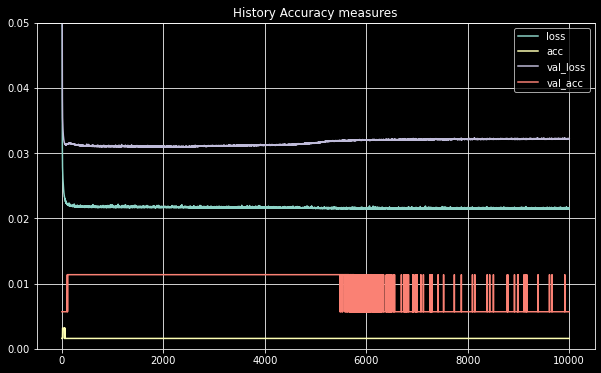

In [178]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
## Change scale
plt.title("History Accuracy measures")
plt.gca().set_ylim(0,0.050) # This sets vertical range to [0-1]
plt.show()

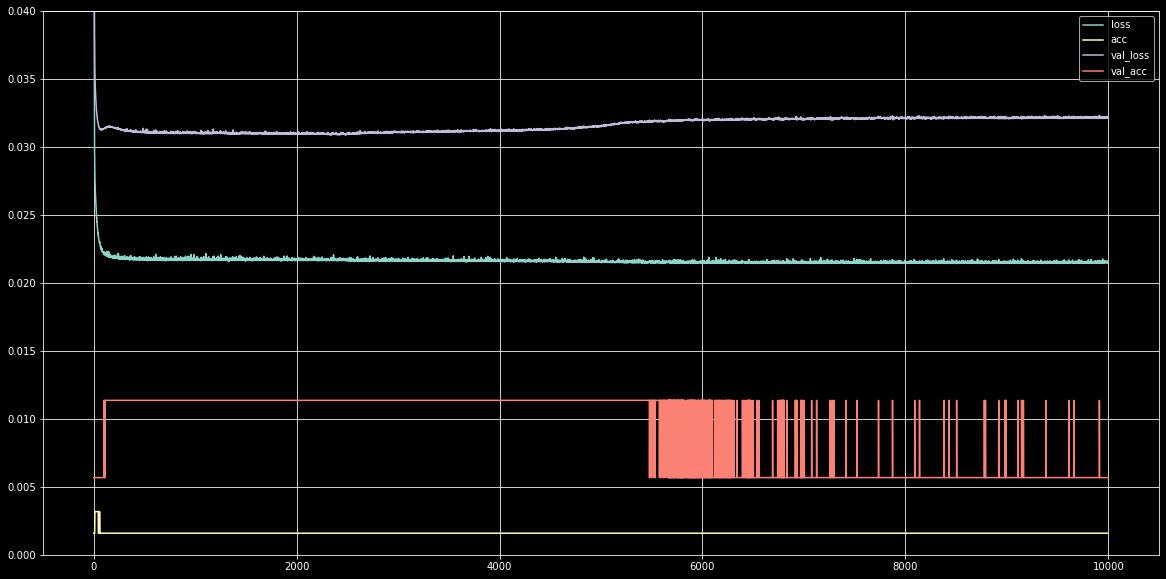

In [179]:
pd.DataFrame(history.history).plot(figsize=(20,10))
plt.grid(True)
plt.gca().set_ylim(0,0.04) # This sets vertical range to [0-1]
plt.show()

### 7.5 Lilst all data in history

In [180]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


### 7.6 Make some predictions with the model

Using the model we predict future values based on the length of the validation dataset

In [181]:
predictions = model1.predict(X_val_MODEL)
predictions

array([[0.4878538 ],
       [0.46841827],
       [0.4076123 ],
       [0.50047475],
       [0.4840761 ],
       [0.5040443 ],
       [0.48121357],
       [0.45478103],
       [0.4447891 ],
       [0.5136378 ],
       [0.454082  ],
       [0.50036097],
       [0.5130905 ],
       [0.5024992 ],
       [0.4635471 ],
       [0.46864337],
       [0.5114604 ],
       [0.49703664],
       [0.45887828],
       [0.44495702],
       [0.50558335],
       [0.5358317 ],
       [0.51897585],
       [0.48710307],
       [0.5132498 ],
       [0.4700294 ],
       [0.47106338],
       [0.46653247],
       [0.4805623 ],
       [0.48888317],
       [0.49047267],
       [0.52927244],
       [0.50562876],
       [0.50316143],
       [0.44251132],
       [0.50494635],
       [0.5311502 ],
       [0.52247727],
       [0.4730529 ],
       [0.49016827],
       [0.46692327],
       [0.48177183],
       [0.49378884],
       [0.45530626],
       [0.47770113],
       [0.482507  ],
       [0.51082546],
       [0.478

#### 7.6.1 Unscale the data


In [182]:
predictions_unscaled=scaler.inverse_transform(predictions)
predictions_unscaled.shape
(20, 1)

(20, 1)

#### 7.6.2 Flatten predictions


In [183]:
# Flatten predictions
predictions_flat = predictions_unscaled.flatten()

#### 7.6.3 Plot the unscaled predictions


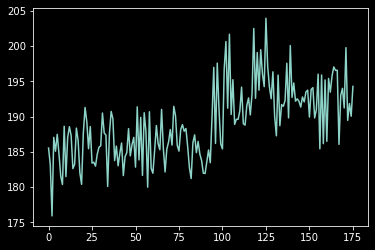

In [184]:
plt.plot(predictions_unscaled)

In [185]:
len(predictions_unscaled)

176

In [186]:
len(X_val_MODEL)

176

#### 7.6.3 Display valdata and predicted values

In [187]:
len(valdata)

181

In [188]:
valdata.shape

(181, 1)

In [189]:
type(valdata)

pandas.core.frame.DataFrame

In [190]:
len(predictions_flat)

176

In [191]:
type(predictions_flat)

numpy.ndarray

Note: valdata must be the same length as the predictions array. As the predictions array is 176 length, we need to substract 5 rows from valdata data set to plot them together.

In [192]:
prediction_plot = pd.Series(predictions_flat, 
                                 # index=valdataf.index[5:])
                                index=valdata.index[0:176])

In [193]:
forecastRNN = pd.Series(prediction_plot, index = valdata.index)

### 7.7 PLot predictions

In [194]:
forecastRNN.head()

PERIOD
2018-05-25    185.542465
2018-05-26    183.210190
2018-05-27    175.913467
2018-05-29    187.056976
2018-05-30    185.089127
dtype: float32

In [195]:
type(forecastRNN)

pandas.core.series.Series

As the forecasted values is a Series, we need to rename it prior to turn it into a plot, otherwise the series will not have heading. We introduce a name for this series

In [196]:
RNNforecast = forecastRNN.rename('Training RNN forecast')

In [197]:
RNNforecast.head()

PERIOD
2018-05-25    185.542465
2018-05-26    183.210190
2018-05-27    175.913467
2018-05-29    187.056976
2018-05-30    185.089127
Name: Training RNN forecast, dtype: float32

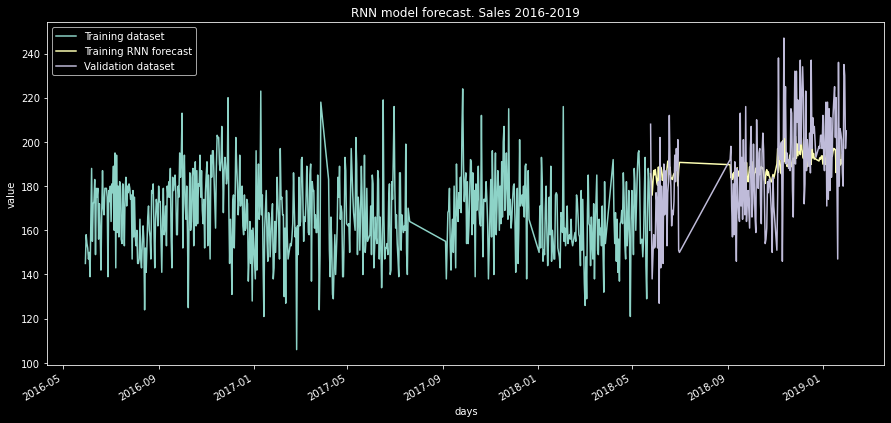

In [198]:
plt.figure(figsize=(15,7))
plt.title('RNN model forecast. Sales 2016-2019')
plt.plot(traindata, label = "Training dataset")  # Dataset 
RNNforecast.plot() # Series 
plt.plot(valdata, label = "Validation dataset") # Dataset
plt.legend()
plt.ylabel("value")
plt.xlabel("days")
plt.show()

Focus just on forecast and validation datasets

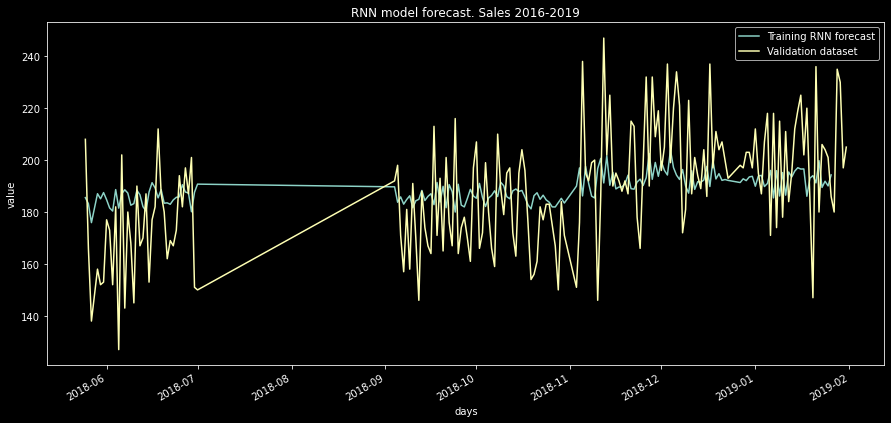

In [199]:
plt.figure(figsize=(15,7))
plt.title('RNN model forecast. Sales 2016-2019')
RNNforecast.plot() # Series 
plt.plot(valdata, label = "Validation dataset") # Dataset
plt.legend()
plt.ylabel("value")
plt.xlabel("days")
plt.show()

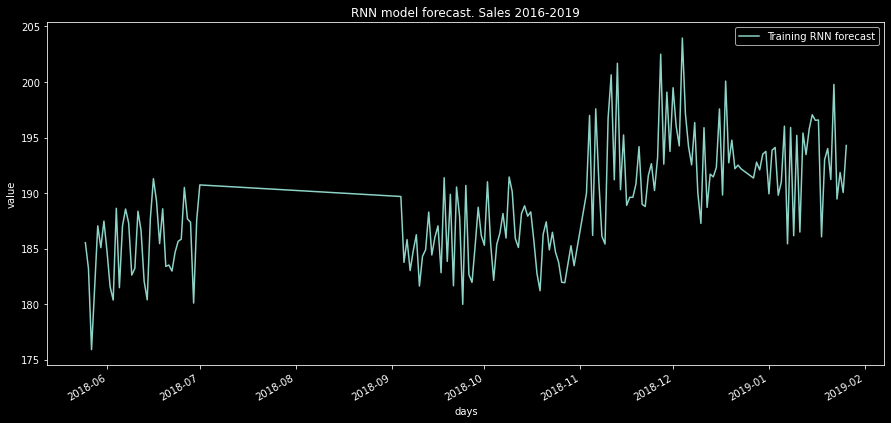

In [200]:
plt.figure(figsize=(15,7))
plt.title('RNN model forecast. Sales 2016-2019')
RNNforecast.plot() # Series 
plt.legend()
plt.ylabel("value")
plt.xlabel("days")
plt.show()

## 8 Compute MAPE value 

In [201]:
type(RNNforecast)


pandas.core.series.Series

In [202]:
type(valdata)

pandas.core.frame.DataFrame

In [203]:
valdata.isnull().sum()

Sales_east    0
dtype: int64

Turn forecasted values into a dataframe

In [204]:
RNNForecast_dataframe = pd.DataFrame(RNNforecast)

In [205]:
RNNForecast_dataframe.isnull().sum()

Training RNN forecast    5
dtype: int64

In [206]:
Check values

SyntaxError: invalid syntax (<ipython-input-206-ffcedc73d0e6>, line 1)

In [207]:
RNNForecast_dataframe

,Training RNN forecast
PERIOD,
2018-05-25,185.542465
2018-05-26,183.210190
2018-05-27,175.913467
2018-05-29,187.056976
2018-05-30,185.089127
...,...
2019-01-27,NaN
2019-01-28,NaN
2019-01-29,NaN


### 8.1 Remove null values prior to computing MAPE value 

In [208]:
RNNForecast_nonul =  RNNForecast_dataframe.copy()

In [209]:
RNNForecast_nonul.isnull().sum()

Training RNN forecast    5
dtype: int64

In [210]:
for row in range(0,len(RNNForecast_nonul)):
    RNNForecast_nonul['Training RNN forecast']=np.where(
                          (np.isnan(RNNForecast_nonul['Training RNN forecast'])),
                           RNNForecast_nonul['Training RNN forecast'].shift(7),RNNForecast_nonul['Training RNN forecast']
                         )

In [211]:
RNNForecast_nonul.isnull().sum()

Training RNN forecast    0
dtype: int64

In [212]:
RNNForecast_nonul

,Training RNN forecast
PERIOD,
2018-05-25,185.542465
2018-05-26,183.210190
2018-05-27,175.913467
2018-05-29,187.056976
2018-05-30,185.089127
...,...
2019-01-27,194.016937
2019-01-28,191.225693
2019-01-29,199.787292


No handles with labels found to put in legend.


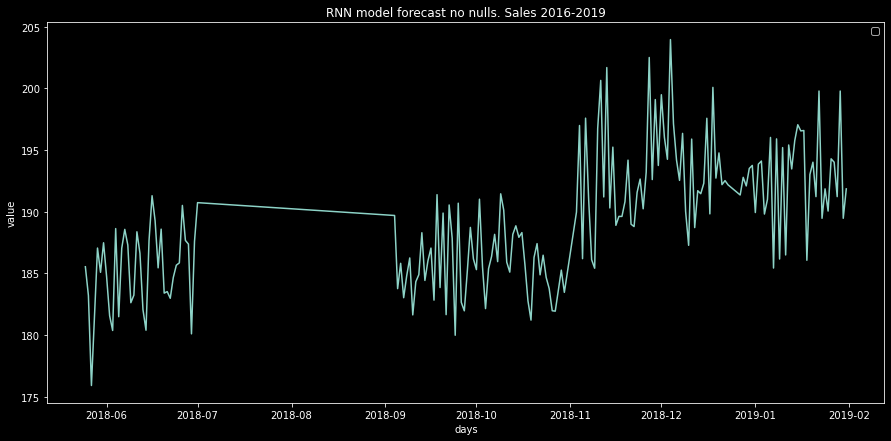

In [213]:
plt.figure(figsize=(15,7))
plt.title('RNN model forecast no nulls. Sales 2016-2019')
plt.plot(RNNForecast_nonul)
plt.legend()
plt.ylabel("value")
plt.xlabel("days")
plt.show()

In [214]:
len(RNNForecast_nonul)

181

In [215]:
len(valdata)

181

In [216]:
RNNForecast_nonul

,Training RNN forecast
PERIOD,
2018-05-25,185.542465
2018-05-26,183.210190
2018-05-27,175.913467
2018-05-29,187.056976
2018-05-30,185.089127
...,...
2019-01-27,194.016937
2019-01-28,191.225693
2019-01-29,199.787292


In [217]:
valdata

,Sales_east
PERIOD,
2018-05-25,208.0
2018-05-26,166.0
2018-05-27,138.0
2018-05-29,158.0
2018-05-30,152.0
...,...
2019-01-27,180.0
2019-01-28,235.0
2019-01-29,230.0


In [218]:
type(valdata)

pandas.core.frame.DataFrame

In [219]:
type(RNNForecast_nonul)

pandas.core.frame.DataFrame

### 8.2 Rename columns in both datasets to calculte MAPE value

In [220]:
ValdataNEW = valdata.rename(columns={'Sales_east':'Value'})

In [221]:
RNNForecastNEW = RNNForecast_nonul.rename(columns={'Training RNN forecast':'Value'})

Both datasets must have the same heading label to be able to use the MAPE formula below

In [222]:
def accuracy_MAPE(ACT,FCAST):
    Value_percent = (abs((ACT-FCAST)/ACT).sum()/len(ACT))*100
    #Mape_value = print(f"RNN model MAPE percent   {Value_percent}")
    #Mape_value_per = print(f"Seasonal ARIMA model MAPE {Value}")
    return Value_percent

In [223]:
accuracy_MAPE(ValdataNEW,RNNForecastNEW)

Value    9.704766
dtype: float64

**Include some percentage formatting**

In [224]:
def MAPE_value(ACT,FCAST):
  #  Value = abs((ACT-FCAST)/ACT).sum()/len(ACT)
    Value  = (abs((ACT-FCAST)/ACT).sum()/len(ACT))*100
    Mape_value = print(f"RNN model MAPE % {Value}")
    #Mape_value_per = print(f"Seasonal ARIMA model MAPE {Value}")
    return Mape_value

In [225]:
MAPE_value(ValdataNEW,RNNForecastNEW)

RNN model MAPE % Value    9.704766
dtype: float64
